# HW2 - Cary Randazzo - Due 6-22-2020

In [1]:
#essential libraries
import pickle
import pandas as pd
import numpy as np
from scipy.special import lambertw
from scipy import *
from scipy import integrate
from scipy.integrate import ode
from scipy.integrate import odeint
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Problem 1
$\ddot{x} + 2 \beta \dot{x} + \omega_{0}^{2}x = 0$ <br>
Try $x(t) = e^{rt}$ <br>
=> $ x(t)=e^{-\beta t}[A_{1} exp[(\beta^{2}-\omega_{0}^{2})t]+ A_{2} exp[-(\beta^{2}-\omega_{0}^{2})t]] $ <br>
$ E = \frac{1}{2}m \dot{x} + \frac{1}{2}m\omega_{0}^{2}x $ <br>

$ \omega_{0}^{2} = \frac{k}{m}=>k=m \omega_{0}^{2} $

### a) Complete the solution to the damped harmonic oscillator begun in class. Find $x(t)$ and $\dot{x}(t)$. Sketch the solution $x(t)$ versus t for the three cases: Underdamped, critically damped, and overdamped. Assume at $t=0$ the oscillator is displaced at a starting amplitude $x=x_0$

<u><b>General Solution</b></u><br>
we choose a trial solution:<br>
$x(t)=e^{rt}$ <br><br>
Then,
$\dot{x} = re^{rt}, (x(t))^n = r^{2}e^{rt} $ <br><br>
Now, substitute expressions for $\dot{x}(t)$ and $\ddot{x}(t)$ in the equation of motion to get to <b>auxiliary equation</b>:<br>
$\implies \ddot{x}+2\beta \dot{x} + \omega_{0}^{2}x=r^2 e^{rt} + 2\beta r e^{rt} + \omega_{0}^{2} e^{rt}=0$
<br>
$r^2 + 2 \beta r + \omega_{0}^{2} = 0$<br><br>
The solution to this quadratic equation is:<Br>
$r = -\beta \pm \sqrt{\beta^2-\omega_{0}^{2}}$ <br><br>
Let each of these roots be $r_1$ and $r_2$ <br>
We can write the solution as:<br>
$x(t) = e^{r_{1}t}+e^{{r_2}t}$<br><br>
The necessary and sufficient condition that a set of functions $y_1,y_2,y_3,...$ be linearly dependant is that the Wronskian determinant of these functions vanish. It does not, and so these functions are linearly independent.<br>
$\implies x(t) = c_{1}e^{r_{1}t} + c_{2}e^{{r_2}t}, r_1 \ne r_2$ <br><br>
For $r=r_1=r_2,\:\: te^{rt}$ is a solution and the general solution becomes:<br>
$ x(t) = c_{1}e^{rt}+c_{2}te^{rt} $ <br>
$ \implies x(t) = e^{-\beta t} [A_1 e^{ \sqrt{ \beta^2 - \omega_{0}^{2}}t} + A_2 e^{ -\sqrt{ \beta^2 - \omega_{0}^{2}}t}] $<br><br>

<u><b>Underdamping</b></u><br>
Underdamped condition: $\omega_{0}^{2} > \beta^2$ <br><br>

Define $\omega_{1}^{2}=\omega_{0}^{2}-\beta^2$ where $\omega_{1}^{2}>0$<br>
This value for $\omega_{0}^{2}$ makes the general solution above imaginary leading to our general solution becoming:<br>
$x(t) = e^{-\beta t} [ A_1 e^{i\omega_1 t} + A_2 e^{-i \omega_1 t} ]$<br>
$ \implies x(t) = A e^{-\beta t} cos(\omega_1 t - \delta) $
<br>(see p111 ex 3.2)<br><br>


<u><b>Critical Damping</b></u><br>
Critical Damping condition: $\omega_{0}^{2} = \beta^2$ <br><br>

$ x(t) = (A+Bt)e^{-\beta t} $ <br><br>

<u><b>Overdamping</b></u><br>
Overdamping Condition: $\omega_{0}^{2} < \beta^2$ <br><br>

Define <br>
$ \omega_2 = \sqrt{ \beta^2 - \omega_{0}^{2} } $<br>
$ x(t) = e^{-\beta t} [ A_1 e^{\omega_2 t} + A_2 e^{-\omega_{2} t} ] $ <br><br>


In [570]:
#plot x(t) vs t for 3 cases
t = np.arange(-20,20,1)
omega_one = 1
delta = 0
beta = 1
A = 1
x_u = A*np.exp(-1*beta*t)*np.cos(omega_one*t-delta) 
B=1
C=1
x_c = (B+C*t) * np.exp(-beta*t)
D=1
E=1
omega_two=1
x_o = np.exp(-beta*t)*( D*np.exp(omega_two*t) + E*np.exp(-omega_two*t) )

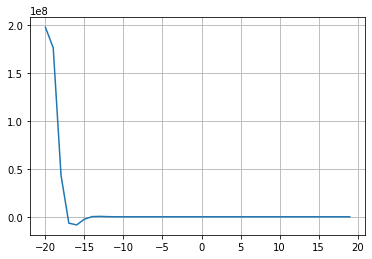

In [571]:
plt.plot(t,x_u)
plt.grid()

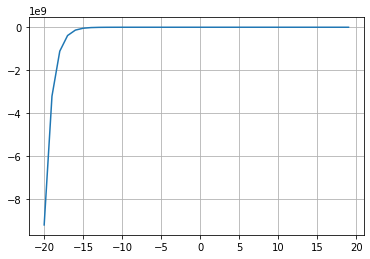

In [572]:
plt.plot(t,x_c)
plt.grid()

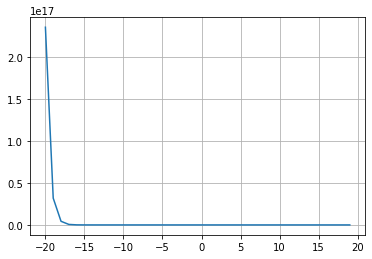

In [573]:
plt.plot(t,x_o)
plt.grid()

### b)Find the expression for the total $E$. At what rate ($\frac{dE}{dt}$) does the system lose energy

E = T + U <br>
T = $\frac{1}{2} m \dot{x}^2 = \frac{1}{2} m (r e^{rt})^2 = \frac{mr^2}{2} e^{2rt}$ <br>
From $ \ddot{x} + 2 \beta \dot{x} + \omega_{0}^{2}x = 0$ <br>
$ \implies Forces(F) = -2m\beta \dot{x} -m\omega_{0}^{2}x $ <br>
$ \implies U = - \int dW = \int -Fdx = \int (2m\beta \frac{dx}{dt} + m\omega_{0}^{2}x)dx$ <br>
$ \implies U = 2m\beta \int \frac{dx}{dt}dx + m\omega_{0}^{2}\frac{x^2}{2}  $<br>
Let $u = dx, dv = \frac{dx}{dt}, du = d^2 x, v = x$<br>
$ \implies U= 2m\beta x \dot{x} + m\omega_{0}^{2}\frac{x^2}{2} $<br>
$ \implies E = T + U = \frac{mr^2}{2} e^{2rt} + 2m\beta x \dot{x} + m\omega_{0}^{2}\frac{x^2}{2}$ <br>
$ \implies E = \frac{mr^2}{2} e^{2rt} + 2m\beta re^{2rt} + \frac{m}{2}\omega_{0}^{2}e^{2rt} $<br>
$ \implies E = \frac{m}{2}e^{2rt} (r^2 + 4\beta r +\omega_{0}^{2})  $<br>
$ \implies \frac{dE}{dt} =  mr(r^2 + 4\beta r +\omega_{0}^{2})e^{2rt}  $<br>
Absorbing all constants looks like:<br>
$ \frac{dE}{dt} = Ae^{2rt} $

### c) Now use the phase portrait approach. Re-write the damped harmonic oscillator equation for motion as a coupled first-order differential equation. Sketch the phase space trajectory, assuming at $t=0$ the oscillator is displaced at a starting amplitude $x=x_0$, for the underdamped, critically damped, and overdamped cases.

$ \ddot{x} + 2\beta \dot{x} + \omega_{0}^{2}x = 0 $ <br>
Define $ \dot{x} = v $<br>
$ \dot{v} = \ddot{x} $<br>
Now,<br>
$ v = \frac{dx}{dt} \implies x-x_0 = \int dx = v \int t = v(t-t_0)$<br>
Assuming v is constant<br>
$ \implies x = x_0 + vt $<br>
Assuming $t_0=0$<br>
$ \implies \dot{v} = \ddot{x} = -2\beta v - \omega_{0}^{2}[ x_0+vt ] $<br>
So, our coupled first order differential equations are:<br>
$ \dot{x} = v $<br>
$ \dot{v} = -2\beta v - \omega_{0}^{2}[ x_0+vt ] $<br>

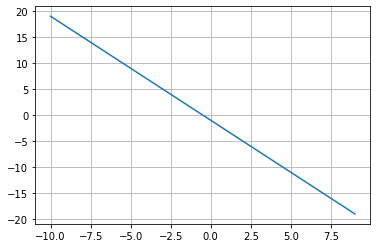

In [578]:
#plot v vs vdot above for beta <,=,> omega_0^2
v = np.arange(-10,10,1)
beta=1
omega_nosq=1
x_no=1
v_dot = -2*beta*v-omega_nosq*(x_no)
plt.plot(v,v_dot)
plt.grid()

### d) Identify the nature of the fixed point $x^*=(0,0)$ using the matrix form of the system and the solutions to the characteristic equation. Does this match your expectations from your phase space trajectory sketches?

<b>(see paper)</b>

## Problem 2

### Consider the folowing vector fields. For each, find and classify all fixed points, and sketch the phase portrait on the circle:

## <b>$ \dot{\theta} = 1+2cos(\theta) $</b>

$ 0=1+2cos(\theta^*) \\
  -1=2cos(\theta^*) \\
  \frac{-1}{2}=cos(\theta^*) \\
  cos^{-1}(\frac{-1}{2})=\theta^* \\ 
$

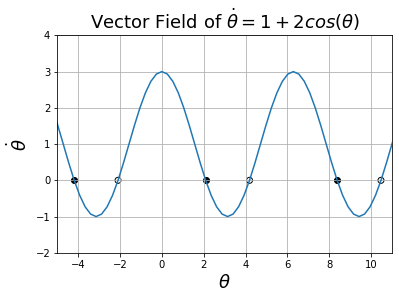

In [408]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/12)
theta_dot = 1+2*np.cos(theta)
plt.grid()
plt.ylim(-2,4)
plt.xlim(-5,11)
plt.xlabel(r'$\theta$',fontsize=18)
plt.ylabel(r'$\dot{\theta}$', fontsize=18)
plt.title(r'Vector Field of $\dot{\theta} = 1+2cos({\theta})$', fontsize=18)
plt.plot(theta,theta_dot)

coeffs = [-2,-1,1,2,4,5]
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.arccos(-0.5),np.zeros(1), color='black')
    else:
               plt.scatter(coeffs[i]*np.arccos(-0.5),np.zeros(1), color='black', facecolors='none')

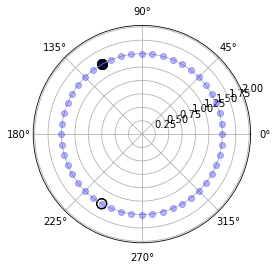

In [487]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/24)
plt.polar(theta,2*np.ones(theta.size),'o', alpha=0.001)
plt.polar(theta,1.5*np.ones(theta.size),'o',color='b', alpha=0.1)
coeffs = [-2,-1,1,2,4,5]
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.arccos(-0.5),1.5*np.ones(1), color='black',s=100)
    else:
               plt.scatter(coeffs[i]*np.arccos(-0.5),1.5*np.ones(1), color='black', facecolors='none',s=100)

- We can see from the above that $\dot{\theta}$ = 0 periodically as cosine is a periodic function. Our fixed points are $\theta^*=ncos^{-1}(\frac{-1}{2})$ where $n$ is any integer that is not 0 or divisible by 3 ($n=...,-4,-2,-1,1,2,4,5,...)$.

## <b>$ \dot{\theta} = sin(2\theta) $</b>

$ sin(2 \theta^*) = 0$ for values of $\theta$ where $ 2 \theta^* = n\pi $ where $n$ is any integer <br>
$ \implies \theta^* = \frac{n \pi}{2}$ <br>
So, for values of $\theta^* = \frac{n \pi}{2}$, $ sin(2 \theta^*)=0$<br>
To visualize this:

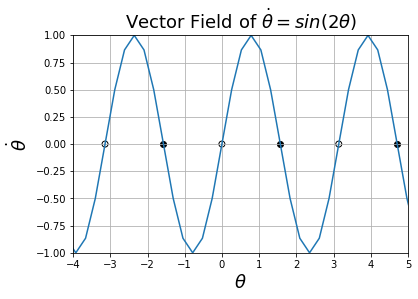

In [507]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/12)
theta_dot = np.sin(2*theta)
plt.grid()
plt.ylim(-1,1)
plt.xlim(-4,5)
plt.xlabel(r'$\theta$',fontsize=18)
plt.ylabel(r'$\dot{\theta}$', fontsize=18)
plt.title(r'Vector Field of $\dot{\theta} = sin({2 \theta})$', fontsize=18)
plt.plot(theta,theta_dot)

coeffs = np.arange(-2,4,1)
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.pi/2+np.sin(2*np.pi/2),np.zeros(1), color='black', facecolors='none')
    else:
               plt.scatter(coeffs[i]*np.pi/2+np.sin(2*np.pi/2),np.zeros(1), color='black')

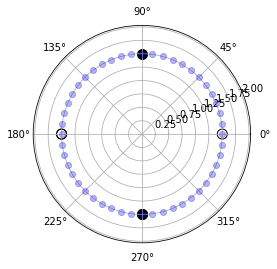

In [508]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/24)
plt.polar(theta,2*np.ones(theta.size),'o', alpha=0.001)
plt.polar(theta,1.5*np.ones(theta.size),'o',color='b', alpha=0.1)
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.pi/2,1.5*np.ones(1), color='black', facecolors='none',s=100)
    else:
               plt.scatter(coeffs[i]*np.pi/2,1.5*np.ones(1), color='black',s=100)

## $ \dot{\theta} = sin^3(\theta) $

To find our fixed points:<br>
$ 0=[sin(\theta^*)]^3 $ <br>
$ \implies 0=sin(\theta^*) $ <br>
Similar to before, our fixed points occur at values of $ \theta^* = n\pi $ where $n$ is any integer

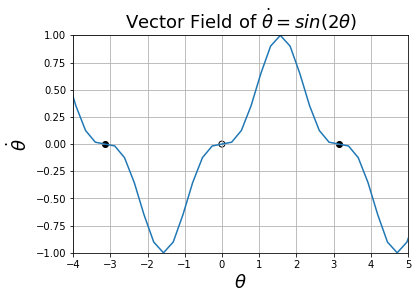

In [509]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/12)
theta_dot = (np.sin(theta))**3
plt.grid()
plt.ylim(-1,1)
plt.xlim(-4,5)
plt.xlabel(r'$\theta$',fontsize=18)
plt.ylabel(r'$\dot{\theta}$', fontsize=18)
plt.title(r'Vector Field of $\dot{\theta} = sin({2 \theta})$', fontsize=18)
plt.plot(theta,theta_dot)

coeffs = np.arange(-2,4,2)
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.pi/2,np.zeros(1), color='black')
    else:
               plt.scatter(coeffs[i]*np.pi/2,np.zeros(1), color='black', facecolor='none')

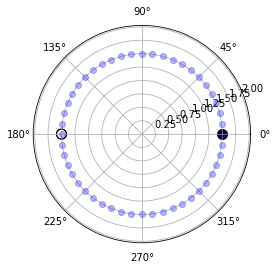

In [511]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/24)
plt.polar(theta,2*np.ones(theta.size),'o', alpha=0.001)
plt.polar(theta,1.5*np.ones(theta.size),'o',color='b', alpha=0.1)
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.pi/2,1.5*np.ones(1), color='black', facecolors='none',s=100)
    else:
               plt.scatter(coeffs[i]*np.pi/2,1.5*np.ones(1), color='black',s=100)

## $ \dot{\theta} = sin(\theta)+cos(\theta) $
$ 0 = sin(\theta^*) + cos(\theta^*) $ <br>
$ -sin(\theta^*) = cos(\theta^*) $ <br>
$ \frac{sin(\theta^*)}{cos(\theta^*)}=-1 $ <br>
$ tan(\theta^*)=-1 $ <br>
$ \theta^* = tan^{-1}(tan(\theta^*))=tan^{-1}(-1) $ <br>
$ \theta^* = tan^{-1}(-1)$ <br>

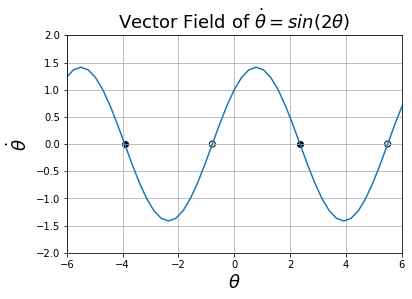

In [531]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/12)
theta_dot = np.sin(theta) + np.cos(theta)
plt.grid()
plt.ylim(-2,2)
plt.xlim(-6,6)
plt.xlabel(r'$\theta$',fontsize=18)
plt.ylabel(r'$\dot{\theta}$', fontsize=18)
plt.title(r'Vector Field of $\dot{\theta} = sin({2 \theta})$', fontsize=18)
plt.plot(theta,theta_dot)

coeffs = [-7,-3,1,5]
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.arctan(-1),np.zeros(1), color='black',facecolor='none')
    else:
               plt.scatter(coeffs[i]*np.arctan(-1),np.zeros(1), color='black')

$ \theta^* = n \cdot tan^{-1}(-1) $ <br> where $n$ is odd values of distance 4 from one another such that $n=...-7,-3,1,5,...$

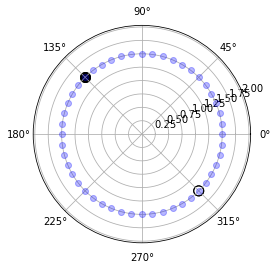

In [533]:
theta = np.arange(-2*np.pi,4*np.pi,np.pi/24)
plt.polar(theta,2*np.ones(theta.size),'o', alpha=0.001)
plt.polar(theta,1.5*np.ones(theta.size),'o',color='b', alpha=0.1)
for i in range(0,len(coeffs)):
    if (i%2)==0:
               plt.scatter(coeffs[i]*np.arctan(-1),1.5*np.ones(1), color='black', facecolors='none',s=100)
    else:
               plt.scatter(coeffs[i]*np.arctan(-1),1.5*np.ones(1), color='black',s=100)

## Problem 3

### write the following systems in matrix form

## $ \dot{x} = -y, \dot{y} = -x $

For systems of form:<br>
$ \dot{x} = ax + by $ <br>
$ \dot{y} = cx + dy $ <br>
Matrix is of the form:<br>
<b>$\dot{\textbf{x}}$</b> = $A$<b>$\textbf{x}$</b> where <br>
A = $\begin{bmatrix}a&b \\ c&d \end{bmatrix}$ and $\textbf{x} = \begin{bmatrix} x \\ y \end{bmatrix}$ <br>
For this system:<br>
$\dot{x} = 0x + (-1)y$ <br>
$ \dot{y} = (-1)x + 0y $ <br><br>
So $ a=0, b=-1 $ <br>
$ c = -1, d=0 $<br>
$\begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix}  
= \begin{bmatrix} 0&-1\\-1&0 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$

## $ \dot{x} = 3x-2y, \dot{y} = 2y-x $

For this system:<br>
$\dot{x} = 3x + -2y$ <br>
$ \dot{y} = (-1)x + 2y $ <br><br>
So $ a=3, b=-2 $ <br>
$ c = -1, d=2 $<br>
$\begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix}  
= \begin{bmatrix} 3&-2\\-1&2 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$

## $ \dot{x} =0, \dot{y} = x + y $

For this system:<br>
$\dot{x} = 0x + 0y$ <br>
$ \dot{y} = 1x + 1y $ <br><br>
So $ a=0, b=0 $ <br>
$ c = 1, d=1 $<br>
$\begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix}  
= \begin{bmatrix} 0&0\\1&1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$

## $ \dot{x} = x , \dot{y} = 5x + y $

For this system:<br>
$\dot{x} = 1x + 0y$ <br>
$ \dot{y} = 5x + 1y $ <br><br>
So $ a=1, b=0 $ <br>
$ c = 5, d=1 $<br>
$\begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix}  
= \begin{bmatrix} 1&0\\5&1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}$

## Problem 4

### consider the system<br> $ \dot{x} = -y, \dot{y}=-x $

### a) sketch the vector field

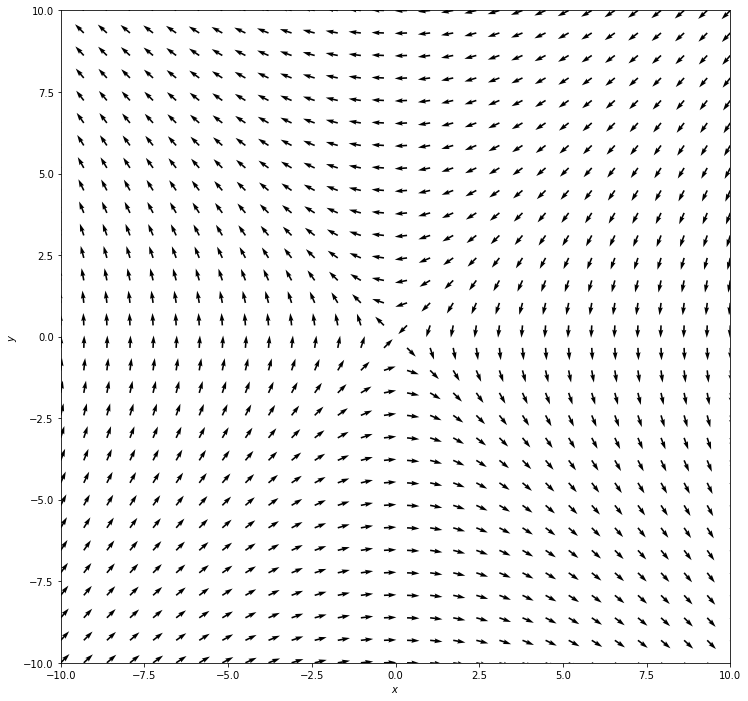

In [546]:
#Vector Field
fig = plt.figure(num=1, figsize=(12,12))
ax=fig.add_subplot(111)
X,Y = np.meshgrid( np.linspace(-10,10,30), np.linspace(-10,10,30) )
U = -Y 
V = -X
#Normalize arrows
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
ax.quiver(X,Y,U2,V2)
#plot
plt.xlim(-10,10) 
plt.ylim(-10,10) 
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

### b) Show that the phase trajectories of the system are hyperbolas of the form $x^2-y^2=C$ (Hint: The governing equations imply $ \dot{x}x-\dot{y}y=0 $ and then integrate both sides.
the integration leads to the first equation ..make sure to add the C

$ \dot{x} x - \dot{y} y = 0 $ <br>
$ \frac{dx}{dt} x - \frac{dy}{dt}y = 0 $ <br>
$ x dx - ydy = 0 $ <br>
$ xdx = ydy $ <br>
$ \int xdx = \int ydy $ <br>
$ \frac{x^2}{2} = \frac{y^2}{2} +C $ <br>
$ \implies x^2 - y^2 = C $ <br>

### c) The origin is a saddle point. Find the equations for its stable and unstable manifolds.

$ \dot{x} = -y $ <br>
$ \dot{y} = -x $ <br><br>
$\begin{bmatrix} \dot{x} \\ \dot{y} \end{bmatrix} = \begin{bmatrix} 0&-1 \\ -1&0 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix}$<br>
$\tau = $ Trace of matrix $ tr(A) = \sum_1^N{a_{ii}=a_{11}+a_{22}+...} $ <br>
$\implies \tau = 0+0=0 $ <br>
$ \Delta = $ Deteterminant of matrix $Det(A) = 0-1=-1 $<br>
The characteristic equation is given by:<br>
$ \lambda_1 = \frac{\tau+\sqrt{\tau^2-4\Delta}}{2}, \lambda_2=\frac{\tau-\sqrt{\tau^2-4\Delta}}{2} $ <br> 
$ \implies \lambda_1 = \frac{0+\sqrt{0^2-4(-1)}}{2}, \lambda_2=\frac{0-\sqrt{0^2-4(-1)}}{2} $ <br> 
$ \implies \lambda_1 = 1, \lambda_2 = -1 $ <br>
The eigenvectors are specified by $\textbf{v}(v_1,v_2)$ as: <br>
$ \begin{bmatrix} 0-\lambda & -1 \\ -1 & 0-\lambda  \end{bmatrix} 
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0\\0 \end{bmatrix} $ <br>
For $\lambda_1 =1$: <br>
$ \begin{bmatrix} 0-1 & -1 \\ -1 & 0-1  \end{bmatrix} 
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0\\0 \end{bmatrix} $ <br>
$ \begin{bmatrix} -1 & -1 \\ -1 & -1  \end{bmatrix} 
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0\\0 \end{bmatrix} $ <br>
$ \begin{bmatrix} -1 & -1 \\ 0 & 0  \end{bmatrix} 
\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0\\0 \end{bmatrix} $ <br>
$ v_1 = -v_2 $ <br>
$ \implies$ For $\lambda_1 = 1, \textbf{x}_1 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$ <br>
Similarly for $\lambda_2 = -1, \textbf{x}_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} $<br>
The line spanned by these eigenvectors should be the stable and unstable manifolds such that $y = x$ and $y=-x$<br>
By taking substituting $y=x$ into $\dot{x} = -y , \dot{y} = -x $<br>
$ \implies \dot{x} = x, \dot{y} = -y$ <br>
Here $x^* = 0$ and $y^* = 0$<br>
(stable) <br>
The other one is unstable.

### d) The system can be decoupled and solved with a change of variables $u=x+y$ and $v=x-y$. Rewrite the system in terms of $u$ and $v$ and sovle for u(t) and v(t) with arbitrary initial conditions $(u_0,v_0)$. What are the general solutions for $x(t)$ and $y(t)$?

$\dot{u} = \dot{x} +\dot{y}$<br>
$\dot{v} = \dot{x} -\dot{y}$<br>
$\dot{x}-\dot{y} = -y-(-x)$, <br>
$\dot{v} = v$<br>
<br>
$\dot{x}+\dot{y}=-x-y $<br>
$\dot{u} = -(x+y) = u?$ <br> <br>

$\dot{u}=-u$ <br>
$\frac{du}{u} = -dt$ <br>

- when you have these solutions, k(t) = $\frac{1}{2}(u(t)+v(t))^2 = \frac{1}{2}(u_{0}e^{-2}+v_{0}^2)$


$ u = x+y$<br>
$ v = x-y$<br>
$ \dot{u} = \dot{x}+\dot{y}$<br>    
From the system, $ \implies \dot{u}=(-y)-x =-(x+y) = u $<br>    
Now,<br>
$\dot{u} = -u $<br>
$\implies \frac{du}{u} = -dt $<br>
$\implies ln(u)=-t $<br>
$\implies u= e^{-t} $<br>
Solutions will scale by $u(0)=0$ such that $u_0 e^{-t} = u$<br>
Similarly with v:<br>
$\dot{v} = \dot{x}-\dot{y} = ...$<br>
$ v_0 e^t = v $<br>

## Problem 5

### Problem 5.1.10 in Strogatz. N.B. Be sure to read the discussions thoroughly! This problem introduces a fundamental concept in stability analysis in a quantitative fashion.

a)neither <br>
b)neither <br>
c)neither <br>
d)neither <br>
e)neither <br>
f)neither <br>

## Problem 6
- this problem is like problem 4

### Consider the system: $ \dot{x} = 4x-y, \dot{y}=2x+y$

### a) Write the system in matrix form. Show that the characteristic polynomial is $\lambda^2-5\lambda+6=0$, and find the eigenvalues and eigenvectors. 

(<b>see paper</b>)

### b) Find the general solution of the system

(<b>see paper</b>)

### c) Classify the fixed point at the origin.

(<b>see paper</b>)

### d) Solve the system subject to the initial conditions$(x_0,y_0)=(3,4)$

(<b>see paper</b>)

## Problem 7

### Plot the phase portrait and classify the fixed point of the following linear systems. If the eigenvectors are real, indicate them in your sketch:

### $\dot{x} = y, \dot{y} = -2x-3y$

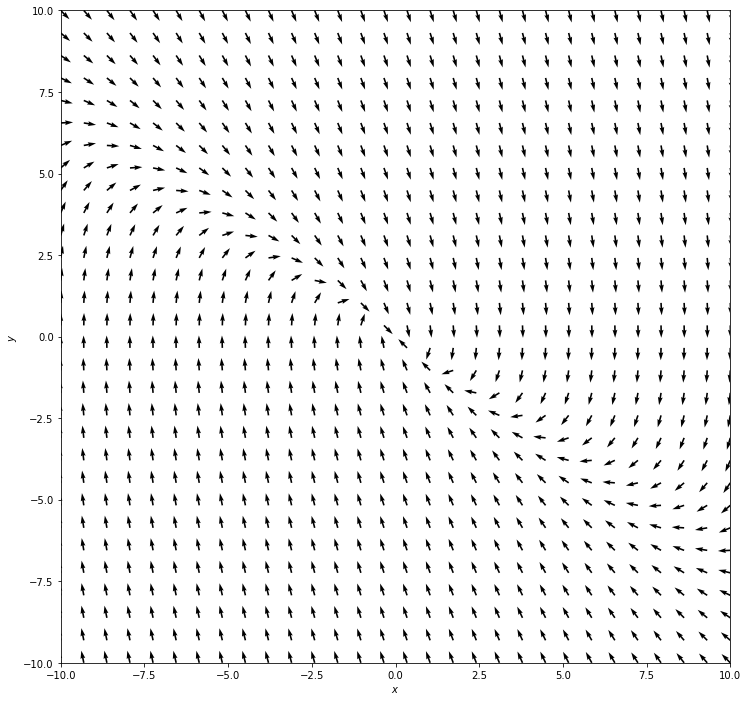

In [548]:
#Vector Field
fig = plt.figure(num=1, figsize=(12,12))
ax=fig.add_subplot(111)
X,Y = np.meshgrid( np.linspace(-10,10,30), np.linspace(-10,10,30) )
U = Y 
V = -2*X-3*Y
#Normalize arrows
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
ax.quiver(X,Y,U2,V2)
#plot
plt.xlim(-10,10) 
plt.ylim(-10,10) 
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

STABLE

### $ \dot{x} = 5x+10y, \dot{y}=-x-y $

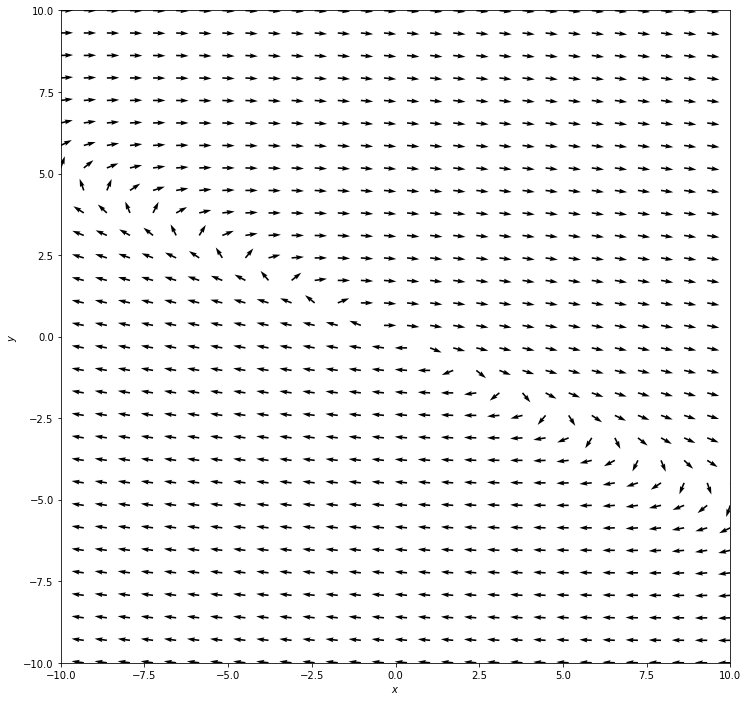

In [549]:
#Vector Field
fig = plt.figure(num=1, figsize=(12,12))
ax=fig.add_subplot(111)
X,Y = np.meshgrid( np.linspace(-10,10,30), np.linspace(-10,10,30) )
U = 5*X + 10*Y
V = -X-Y
#Normalize arrows
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
ax.quiver(X,Y,U2,V2)
#plot
plt.xlim(-10,10) 
plt.ylim(-10,10) 
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

UNSTABLE

### $ \dot{x} = 3x-4y, \dot{y}=x-y $

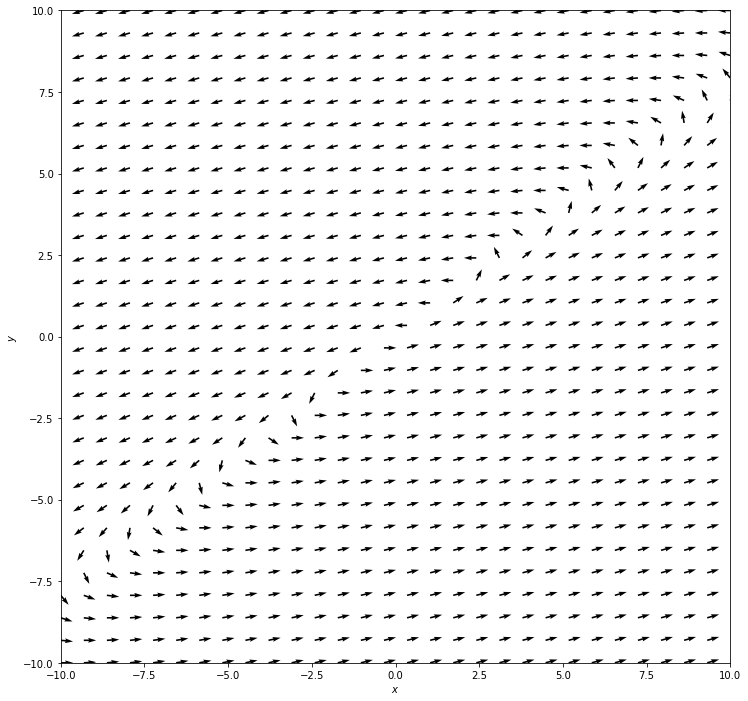

In [550]:
#Vector Field
fig = plt.figure(num=1, figsize=(12,12))
ax=fig.add_subplot(111)
X,Y = np.meshgrid( np.linspace(-10,10,30), np.linspace(-10,10,30) )
U = 3*X-4*Y
V = X-Y
#Normalize arrows
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
ax.quiver(X,Y,U2,V2)
#plot
plt.xlim(-10,10) 
plt.ylim(-10,10) 
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

UNSTABLE

### $ \dot{x} = -3x+2y, \dot{y}=x-2y $

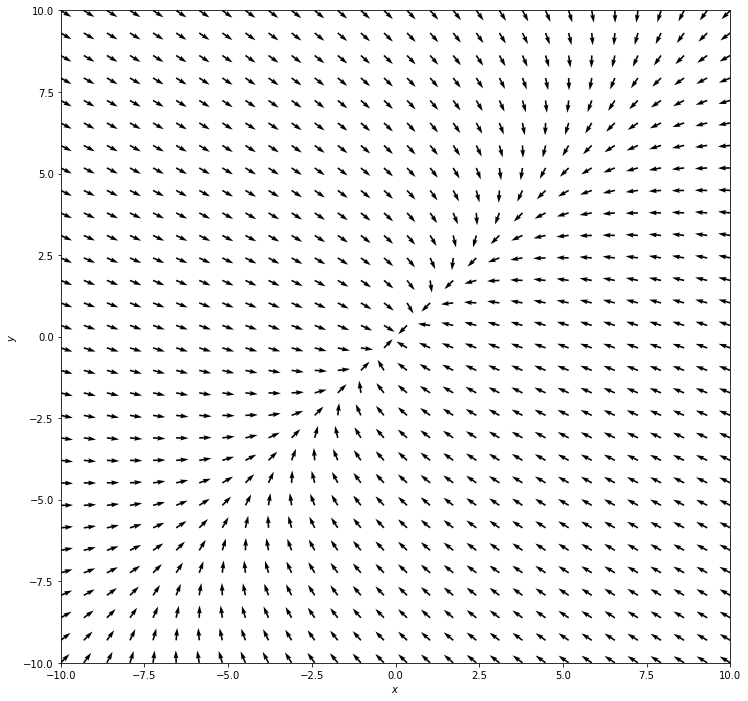

In [552]:
#Vector Field
fig = plt.figure(num=1, figsize=(12,12))
ax=fig.add_subplot(111)
X,Y = np.meshgrid( np.linspace(-10,10,30), np.linspace(-10,10,30) )
U = -3*X + 2*Y
V = X-2*Y
#Normalize arrows
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
ax.quiver(X,Y,U2,V2)
#plot
plt.xlim(-10,10) 
plt.ylim(-10,10) 
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

STABLE

## (END HW2) ASIDE: <br>Creating the Direction Field. First we need to be able to numberically solve the ODE.
We will now focus on developing the Dormand Prince method of RK45

### Scipy uses the Dormand Prince method of RK45 in its solution of ode. What follows is my attempt to replicate the results:

given the following system: <br>
$ y' = f(t,y) \\
y(t_0)=y_0 $ <br>
We wish to find the solution $ y(t) $
<br><br>

Runge Kutta 4 method follows:<br>

$ k_1 = hf(t_k,y_k),$ <br> 
$ k_2 = hf(t_k + \frac{1}{5}h , y_k+\frac{1}{5} k_1),$ <br>
$ k_3 = hf(t_k + \frac{3}{10}h, y_k+\frac{3}{40}k_1+\frac{9}{40}k_2), $ <br>
$ k_4 = hf(t_k + \frac{4}{5}h, y_k+\frac{44}{45}k_1-\frac{56}{15}k_2+\frac{32}{9}k_3), $ <br>
$ k_5 = hf(t_k + \frac{8}{9}h, y_k+\frac{19372}{6561}k_1-\frac{25360}{2187}k_2+\frac{64448}{6561}k_3-\frac{212}{729}k_4), $ <br>
$ k_6 = hf(t_k + h, y_k+\frac{9017}{3168}k_1-\frac{355}{33}k_2-\frac{46732}{5247}k_3-\frac{49}{176}k_4-\frac{5103}{18656}k_5), $ <br>
$ k_7 = hf(t_k + h, y_k+\frac{35}{384}k_1+\frac{500}{1113}k_3+\frac{125}{192}k_4-\frac{2187}{6784}k_5+\frac{11}{84}k_6). $ <br>

Next, <br> $y_{k+1} = y_k + \frac{35}{384}k_1+\frac{500}{1113}k_3+\frac{125}{192}k_4-\frac{2187}{6784}k_5+\frac{11}{84}k_6.$ <br>

Next, <br>
$ z_{k+1} = y_k + \frac{5179}{57600}k_1+\frac{7571}{16695}k_3+\frac{393}{640}k_4-\frac{92097}{339200}k_5+\frac{187}{2100}k_6+\frac{1}{40}k_7$ <br>

Next, we calculate the error in $y_{k+1}$ <br>
$|z_{k+1}-y_{k+1}|=|\frac{71}{57600}k_1-\frac{71}{16695}k_3+\frac{71}{1920}k_4-\frac{17253}{339200}k_5+\frac{22}{525}k_6-\frac{1}{40}k_7|$

Now, calculate the optimal time interval $h_{opt} $ <br>
$ s = (\frac{\epsilon h}{2|z_{k+1}-y_{k+1}|})^{\frac{1}{5}}$ <br>
$ h_{opt} = sh $ <br>
where $h$ in the right hand side is the old time interval. In programming, the new $ h_{opt} $ will be used in the next step of the calculation.

In [432]:
# we desire to solve the system of differential equations:
# xdot = x+2y
# ydot = 3x+2y
# given y(t0) = y0
#       x(t0) = x0
#         t0  = 0

# initialize variables
eps = 0.000001 # error allowance in one step calculation
x0 = -10                           # = x(t=0)
y0 = 17                            # = y(t=0)
t0 = 0                             # initial time value
h0 = hx_opt = hy_opt = 1           # time step size
tf = 100000                        # how long will this run for?  tf-t0 ticks

# create an array to store the values of our solutions x(t),y(t)
xt=np.zeros(tf+1)
yt=np.zeros(tf+1)
xt[0] = x0
yt[0] = y0


# define System of 1st order differential equations
def eqs(x,y,t,hx_opt,hy_opt):    
    return hx_opt*(x+2*y), hy_opt*(3*x+2*y),t

for i in range(t0,tf):
    k1 = eqs(x0,\
             y0,\
             t0,hx_opt,hy_opt)
    #print("k1:",k1)
    k2 = eqs(x0+(1/5)*k1[0],\
             y0+(1/5)*k1[1],\
             t0+(1/5)*h0, hx_opt,hy_opt)    
    #print("k2:",k2)
    k3 = eqs(x0+(3/40)*k1[0]+(9/40)*k2[0],\
             y0+(3/40)*k1[1]+(9/40)*k2[1],\
             t0+(3/10)*h0,hx_opt,hy_opt)
    #print("k3:",k3)
    k4 = eqs(x0+(44/45)*k1[0]-(56/15)*k2[0]+(32/9)*k3[0],\
             y0+(44/45)*k1[1]-(56/15)*k2[1]+(32/9)*k3[1],\
             t0+(4/5)*h0,hx_opt,hy_opt)
    #print("k4:",k4)
    k5 = eqs(x0+(19372/6561)*k1[0]-(25360/2187)*k2[0]+(64448/6561)*k3[0]-(212/729)*k4[0],\
             y0+(19372/6561)*k1[1]-(25360/2187)*k2[1]+(64448/6561)*k3[1]-(212/729)*k4[1],\
             t0+(8/9)*h0,hx_opt,hy_opt)
    #print("k5:",k5)
    k6 = eqs(x0+(9017/3168)*k1[0]-(355/33)*k2[0]-(46732/5247)*k3[0]-(49/176)*k4[0]-(5103/18656)*k5[0],\
             y0+(9017/3168)*k1[1]-(355/33)*k2[1]-(46732/5247)*k3[1]-(49/176)*k4[1]-(5103/18656)*k5[1],\
             t0+h0,hx_opt,hy_opt)
    #print("k6:",k6)
    k7 = eqs(x0+(35/384)*k1[0]+(500/1113)*k3[0]+(125/192)*k4[0]-(2187/6784)*k5[0]+(11/84)*k6[0],\
             y0+(35/384)*k1[1]+(500/1113)*k3[1]+(125/192)*k4[1]-(2187/6784)*k5[1]+(11/84)*k6[1],\
             t0+h0,hx_opt,hy_opt)
    #print("k7:",k7)
    
    #Store unique solution values from initial conditions
    xt[i+1] = x0 + (35/384)*k1[0] +(500/1113)*k3[0] +(125/192)*k4[0] +(2187/6784)*k5[0] +(11/84)*k6[0]
    yt[i+1] = y0 + (35/384)*k1[1] +(500/1113)*k3[1] +(125/192)*k4[1] +(2187/6784)*k5[1] +(11/84)*k6[1]
    
    zx_kp1 = x0 + (5179/57600)*k1[0] +(7571/16695)*k3[0] +(393/640)*k4[0] \
    -(92097/339200)*k5[0] +(187/2100)*k6[0]+(1/40)*k7[0]
    zy_kp1 = y0 + (5179/57600)*k1[1] +(7571/16695)*k3[1] +(393/640)*k4[1] \
    +(92097/339200)*k5[1] +(187/2100)*k6[1]+(1/40)*k7[1]
    
    err_xnew = np.abs( (71/57600)*k1[0]-(17/16695)*k3[0]+(71/1920)*k4[0]+(17253/339200)*k5[0] \
                      +(22/525)*k6[0]-(1/40)*k7[0] )
    err_ynew = np.abs( (71/57600)*k1[1]-(17/16695)*k3[1]+(71/1920)*k4[1]+(17253/339200)*k5[1] \
                      +(22/525)*k6[1]-(1/40)*k7[1] )
    
    sx = ((eps*hx_opt)/(2*err_xnew))**(1/5)
    sy = ((eps*hy_opt)/(2*err_ynew))**(1/5)
    
    hx_opt = sx*hx_opt
    hy_opt = sy*hy_opt  
    #print("hx:",hx_opt)
    #print("hy:",hy_opt)
    #print(i)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


In [434]:
yt[1]
#print(xt[1:50])
# the arrays approach nan because after so many iterations,
#the compiler cannot keep up with the precisio required to register a number (it gets really really small)

-132.92059923130682

### Calculate the solutions x(t),y(t) for the ode given the initial coditions x0=-10,y0=10 using odeint

In [41]:
def dxdt(x,t):
    X, Y = x
    dXdt = X+2*Y 
    dYdt = 3*X+2*Y
    return dXdt , dYdt

def s_ode(dxdt,X0,Y0):
    t=np.linspace(0,10,500+1)
    x0=X0,Y0
    sol = odeint(dxdt,x0,t)
    return sol
#t = np.linspace(0, 10, 500+1)
#X0 = -10
#Y0 = 9
#x0 = X0, Y0
#sol = odeint(dxdt, x0, t)

In [450]:
#sol[:,1]
s_ode(dxdt,-10,10)

array([[-10.        ,  10.        ],
       [ -9.80198675,   9.80198675],
       [ -9.60789451,   9.60789451],
       ...,
       [ 28.47941301,  42.72030084],
       [ 30.85142869,  46.27830096],
       [ 33.4210017 ,  50.13263754]])

## With our method of solving ODEs in place, we focus on
plotting the <b> Direction Field</b>

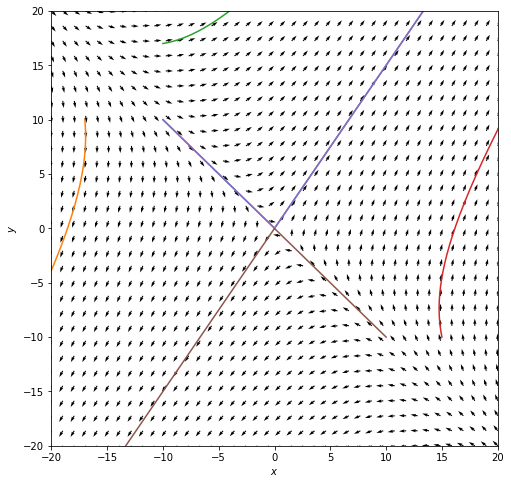

In [42]:
#Vector Field
fig = plt.figure(num=1, figsize=(8,8))
ax=fig.add_subplot(111)
X,Y = np.meshgrid( np.linspace(-20,20,40), np.linspace(-20,20,30) )
U = X+2*Y 
V = 3*X+2*Y 
#Normalize arrows
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
ax.quiver(X,Y,U2,V2)

plt.xlim(-20,20) 
plt.ylim(-20,20) 
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
#plt.plot(xt,yt, 'r',label ='myRK45')
plt.plot(s_ode(dxdt,-10,10)[:,0],s_ode(dxdt,-10,10)[:,1])
plt.plot(s_ode(dxdt,-17,10)[:,0],s_ode(dxdt,-17,10)[:,1])
plt.plot(s_ode(dxdt,-10,17)[:,0],s_ode(dxdt,-10,17)[:,1])
plt.plot(s_ode(dxdt,15,-10)[:,0],s_ode(dxdt,15,-10)[:,1])
plt.plot(s_ode(dxdt,-10,10)[:,0],s_ode(dxdt,-10,10)[:,1])
plt.plot(s_ode(dxdt,10,-10)[:,0],s_ode(dxdt,10,-10)[:,1])
plt.show()

### Example use of vector field

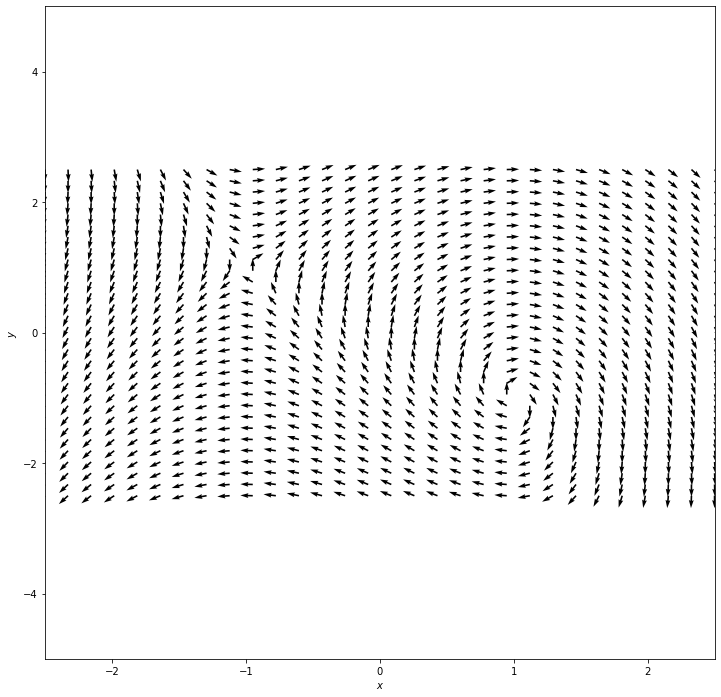

In [547]:
def dxdt(x,t):
    X, Y = x
    dXdt = 1
    dYdt = 1 #1+2*np.cos(X)
    return dXdt , dYdt

def s_ode(dxdt,X0,Y0):
    t=np.linspace(0,10,500+1)
    x0=X0,Y0
    sol = odeint(dxdt,x0,t)
    return sol
#t = np.linspace(0, 10, 500+1)
#X0 = -10
#Y0 = 9
#x0 = X0, Y0
#sol = odeint(dxdt, x0, t)

#Vector Field
fig = plt.figure(num=1, figsize=(12,12))
ax=fig.add_subplot(111)
#X,Y = np.meshgrid( np.linspace(-20,20,30), np.linspace(-20,20,30) )
X,Y = np.meshgrid( np.linspace(-2.5,2.5,30), np.linspace(-2.5,2.5,30) )
U = X+Y#1 
V = 1-X**2 #1+2*np.cos(X)
#Normalize arrows
N = np.sqrt(U**2+V**2)
U2, V2 = U/N, V/N
ax.quiver(X,Y,U2,V2)

plt.xlim(-2.5,2.5) 
plt.ylim(-5,5) 
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
#plt.plot(xt,yt, 'r',label ='myRK45')
plt.plot(s_ode(dxdt,-10,10)[:,0],s_ode(dxdt,-10,10)[:,1])
plt.plot(s_ode(dxdt,-17,10)[:,0],s_ode(dxdt,-17,10)[:,1])
plt.plot(s_ode(dxdt,-10,17)[:,0],s_ode(dxdt,-10,17)[:,1])
plt.plot(s_ode(dxdt,15,-10)[:,0],s_ode(dxdt,15,-10)[:,1])
plt.plot(s_ode(dxdt,-10,10)[:,0],s_ode(dxdt,-10,10)[:,1])
plt.plot(s_ode(dxdt,10,-10)[:,0],s_ode(dxdt,10,-10)[:,1])
plt.show()